<a href="https://colab.research.google.com/github/juniousnj/SPICE-2024/blob/main/pmdarima_waveheights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install statsmodels
!pip install pmdarima
!pip intall seaborn
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

from sklearn import linear_model

from pandas import to_datetime
import datetime
from datetime import datetime
import pandas as pd
#import pmdarima as pm
import itertools
import warnings
import matplotlib.pyplot as plt
from matplotlib import pyplot

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_predict

warnings.filterwarnings('ignore')
import seaborn as sns

ERROR: unknown command "intall" - maybe you meant "install"


In [5]:
df16 = pd.read_csv("https://www.ndbc.noaa.gov/view_text_file.php?filename=41049h2016.txt.gz&dir=data/historical/stdmet/"
                  , delimiter= '\s+', index_col=False) # reading in the data
df17 = pd.read_csv("https://www.ndbc.noaa.gov/view_text_file.php?filename=41049h2017.txt.gz&dir=data/historical/stdmet/"
                  , delimiter= '\s+', index_col=False) # reading in the data

In [6]:
df16.head() # looking at first five rows

,#YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
0,#yr,mo,dy,hr,mn,degT,m/s,m/s,m,sec,sec,degT,hPa,degC,degC,degC,mi,ft
1,2015,12,31,23,50,105,5.8,7.3,1.36,7.14,6.50,124,1025.2,23.9,24.5,19.1,99.0,99.00
2,2016,01,01,00,50,116,6.3,8.0,1.47,8.33,6.34,130,1025.2,24.0,24.4,18.6,99.0,99.00
3,2016,01,01,01,50,121,5.0,6.5,1.27,7.14,6.12,127,1025.7,24.0,24.2,18.5,99.0,99.00
4,2016,01,01,02,50,135,4.4,5.5,1.42,8.33,6.39,118,1025.6,24.0,24.1,18.2,99.0,99.00


In [7]:
df17.head() # looking at first five rows

,#YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
0,#yr,mo,dy,hr,mn,degT,m/s,m/s,m,sec,sec,degT,hPa,degC,degC,degC,mi,ft
1,2016,12,31,23,50,54,8.6,10.5,3.93,11.43,8.29,306,1025.7,20.7,24.3,12.7,99.0,99.00
2,2017,01,01,00,50,55,8.3,11.2,3.56,12.12,7.96,305,1026.2,20.9,24.3,13.0,99.0,99.00
3,2017,01,01,01,50,56,8.2,10.2,3.50,11.43,8.09,298,1026.7,20.8,24.3,13.6,99.0,99.00
4,2017,01,01,02,50,55,7.9,9.8,3.44,12.12,7.90,292,1027.2,20.8,24.3,13.2,99.0,99.00


In [8]:
na_values = pd.DataFrame(df16.isna().sum()) # looking at na values
na_values # typing in the variable name prints it out for you

,0
#YY,0
MM,0
DD,0
hh,0
mm,0
WDIR,0
WSPD,0
GST,0
WVHT,0
DPD,0


In [9]:
na_values = pd.DataFrame(df17.isna().sum()) # looking at na values
na_values # typing in the variable name prints it out for you

,0
#YY,0
MM,0
DD,0
hh,0
mm,0
WDIR,0
WSPD,0
GST,0
WVHT,0
DPD,0


In [10]:
print(len(df16))
print(len(df17))

8713
8712


In [11]:
df16_clean = df16.iloc[1:] # dropping the first two rows
df16_clean

,#YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
1,2015,12,31,23,50,105,5.8,7.3,1.36,7.14,6.50,124,1025.2,23.9,24.5,19.1,99.0,99.00
2,2016,01,01,00,50,116,6.3,8.0,1.47,8.33,6.34,130,1025.2,24.0,24.4,18.6,99.0,99.00
3,2016,01,01,01,50,121,5.0,6.5,1.27,7.14,6.12,127,1025.7,24.0,24.2,18.5,99.0,99.00
4,2016,01,01,02,50,135,4.4,5.5,1.42,8.33,6.39,118,1025.6,24.0,24.1,18.2,99.0,99.00
5,2016,01,01,03,50,142,4.0,4.8,1.40,7.14,6.48,120,1024.7,23.7,24.0,18.8,99.0,99.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8708,2016,12,31,18,50,23,9.0,11.8,3.49,10.81,7.46,308,1024.0,21.3,24.3,12.4,99.0,99.00
8709,2016,12,31,19,50,25,9.4,11.1,3.55,11.43,7.82,305,1024.0,21.0,24.3,13.2,99.0,99.00
8710,2016,12,31,20,50,32,8.6,10.4,3.45,10.81,7.62,301,1024.6,20.9,24.3,11.0,99.0,99.00
8711,2016,12,31,21,50,44,8.1,10.2,3.85,10.81,8.29,292,1025.0,20.9,24.3,12.1,99.0,99.00


In [12]:
df17_clean = df17.iloc[1:] # dropping the first two rows
df17_clean

,#YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
1,2016,12,31,23,50,54,8.6,10.5,3.93,11.43,8.29,306,1025.7,20.7,24.3,12.7,99.0,99.00
2,2017,01,01,00,50,55,8.3,11.2,3.56,12.12,7.96,305,1026.2,20.9,24.3,13.0,99.0,99.00
3,2017,01,01,01,50,56,8.2,10.2,3.50,11.43,8.09,298,1026.7,20.8,24.3,13.6,99.0,99.00
4,2017,01,01,02,50,55,7.9,9.8,3.44,12.12,7.90,292,1027.2,20.8,24.3,13.2,99.0,99.00
5,2017,01,01,03,50,60,8.1,9.9,3.72,12.12,8.39,301,1026.8,21.0,24.3,13.4,99.0,99.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8707,2017,12,31,18,50,224,5.9,7.6,1.48,9.09,6.07,43,1018.3,24.7,24.9,20.6,99.0,99.00
8708,2017,12,31,19,50,227,5.5,6.6,1.41,8.33,5.95,358,1018.3,24.7,24.9,20.3,99.0,99.00
8709,2017,12,31,20,50,227,5.9,7.1,1.58,9.09,6.21,69,1018.4,24.5,24.8,20.4,99.0,99.00
8710,2017,12,31,21,50,224,6.6,7.6,1.41,8.33,5.90,318,1018.5,24.4,24.8,20.2,99.0,99.00


In [13]:
df16_clean = df16_clean.astype({'#YY' : str, 'MM' : str, 'DD' : str, 'hh' : str, 'mm' : str}) # converting these columns to a string data type
df16_clean['Date'] = df16_clean['#YY'] + '-' + df16_clean['MM'] + '-' + df16_clean['DD'] + ' ' + df16_clean['hh'] + ':' + df16_clean['mm'] # combining all the datetime info into a Date column
df16_clean = df16_clean.drop(columns=['#YY','MM','DD','hh','mm']) # deleting the old date and time columns
df16_clean

,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE,Date
1,105,5.8,7.3,1.36,7.14,6.50,124,1025.2,23.9,24.5,19.1,99.0,99.00,2015-12-31 23:50
2,116,6.3,8.0,1.47,8.33,6.34,130,1025.2,24.0,24.4,18.6,99.0,99.00,2016-01-01 00:50
3,121,5.0,6.5,1.27,7.14,6.12,127,1025.7,24.0,24.2,18.5,99.0,99.00,2016-01-01 01:50
4,135,4.4,5.5,1.42,8.33,6.39,118,1025.6,24.0,24.1,18.2,99.0,99.00,2016-01-01 02:50
5,142,4.0,4.8,1.40,7.14,6.48,120,1024.7,23.7,24.0,18.8,99.0,99.00,2016-01-01 03:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8708,23,9.0,11.8,3.49,10.81,7.46,308,1024.0,21.3,24.3,12.4,99.0,99.00,2016-12-31 18:50
8709,25,9.4,11.1,3.55,11.43,7.82,305,1024.0,21.0,24.3,13.2,99.0,99.00,2016-12-31 19:50
8710,32,8.6,10.4,3.45,10.81,7.62,301,1024.6,20.9,24.3,11.0,99.0,99.00,2016-12-31 20:50
8711,44,8.1,10.2,3.85,10.81,8.29,292,1025.0,20.9,24.3,12.1,99.0,99.00,2016-12-31 21:50


In [14]:
df17_clean = df17_clean.astype({'#YY' : str, 'MM' : str, 'DD' : str, 'hh' : str, 'mm' : str}) # converting these columns to a string data type
df17_clean['Date'] = df17_clean['#YY'] + '-' + df17_clean['MM'] + '-' + df17_clean['DD'] + ' ' + df17_clean['hh'] + ':' + df17_clean['mm'] # combining all the datetime info into a Date column
df17_clean = df17_clean.drop(columns=['#YY','MM','DD','hh','mm']) # deleting the old date and time columns
df17_clean

,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE,Date
1,54,8.6,10.5,3.93,11.43,8.29,306,1025.7,20.7,24.3,12.7,99.0,99.00,2016-12-31 23:50
2,55,8.3,11.2,3.56,12.12,7.96,305,1026.2,20.9,24.3,13.0,99.0,99.00,2017-01-01 00:50
3,56,8.2,10.2,3.50,11.43,8.09,298,1026.7,20.8,24.3,13.6,99.0,99.00,2017-01-01 01:50
4,55,7.9,9.8,3.44,12.12,7.90,292,1027.2,20.8,24.3,13.2,99.0,99.00,2017-01-01 02:50
5,60,8.1,9.9,3.72,12.12,8.39,301,1026.8,21.0,24.3,13.4,99.0,99.00,2017-01-01 03:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8707,224,5.9,7.6,1.48,9.09,6.07,43,1018.3,24.7,24.9,20.6,99.0,99.00,2017-12-31 18:50
8708,227,5.5,6.6,1.41,8.33,5.95,358,1018.3,24.7,24.9,20.3,99.0,99.00,2017-12-31 19:50
8709,227,5.9,7.1,1.58,9.09,6.21,69,1018.4,24.5,24.8,20.4,99.0,99.00,2017-12-31 20:50
8710,224,6.6,7.6,1.41,8.33,5.90,318,1018.5,24.4,24.8,20.2,99.0,99.00,2017-12-31 21:50


In [15]:
df16_clean = df16_clean.drop(df16_clean[df16_clean['WVHT'] == '99.00'].index)#removing any 99.00 values in WVHT

In [16]:
df17_clean = df17_clean.drop(df17_clean[df17_clean['WVHT'] == '99.00'].index)#removing any 99.00 values in WVHT

In [17]:
df16_clean['Date'] = pd.to_datetime(df16_clean['Date'])
df16_clean

,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE,Date
1,105,5.8,7.3,1.36,7.14,6.50,124,1025.2,23.9,24.5,19.1,99.0,99.00,2015-12-31 23:50:00
2,116,6.3,8.0,1.47,8.33,6.34,130,1025.2,24.0,24.4,18.6,99.0,99.00,2016-01-01 00:50:00
3,121,5.0,6.5,1.27,7.14,6.12,127,1025.7,24.0,24.2,18.5,99.0,99.00,2016-01-01 01:50:00
4,135,4.4,5.5,1.42,8.33,6.39,118,1025.6,24.0,24.1,18.2,99.0,99.00,2016-01-01 02:50:00
5,142,4.0,4.8,1.40,7.14,6.48,120,1024.7,23.7,24.0,18.8,99.0,99.00,2016-01-01 03:50:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8708,23,9.0,11.8,3.49,10.81,7.46,308,1024.0,21.3,24.3,12.4,99.0,99.00,2016-12-31 18:50:00
8709,25,9.4,11.1,3.55,11.43,7.82,305,1024.0,21.0,24.3,13.2,99.0,99.00,2016-12-31 19:50:00
8710,32,8.6,10.4,3.45,10.81,7.62,301,1024.6,20.9,24.3,11.0,99.0,99.00,2016-12-31 20:50:00
8711,44,8.1,10.2,3.85,10.81,8.29,292,1025.0,20.9,24.3,12.1,99.0,99.00,2016-12-31 21:50:00


In [18]:
df17_clean['Date'] = pd.to_datetime(df17_clean['Date'])
df17_clean

,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE,Date
1,54,8.6,10.5,3.93,11.43,8.29,306,1025.7,20.7,24.3,12.7,99.0,99.00,2016-12-31 23:50:00
2,55,8.3,11.2,3.56,12.12,7.96,305,1026.2,20.9,24.3,13.0,99.0,99.00,2017-01-01 00:50:00
3,56,8.2,10.2,3.50,11.43,8.09,298,1026.7,20.8,24.3,13.6,99.0,99.00,2017-01-01 01:50:00
4,55,7.9,9.8,3.44,12.12,7.90,292,1027.2,20.8,24.3,13.2,99.0,99.00,2017-01-01 02:50:00
5,60,8.1,9.9,3.72,12.12,8.39,301,1026.8,21.0,24.3,13.4,99.0,99.00,2017-01-01 03:50:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8707,224,5.9,7.6,1.48,9.09,6.07,43,1018.3,24.7,24.9,20.6,99.0,99.00,2017-12-31 18:50:00
8708,227,5.5,6.6,1.41,8.33,5.95,358,1018.3,24.7,24.9,20.3,99.0,99.00,2017-12-31 19:50:00
8709,227,5.9,7.1,1.58,9.09,6.21,69,1018.4,24.5,24.8,20.4,99.0,99.00,2017-12-31 20:50:00
8710,224,6.6,7.6,1.41,8.33,5.90,318,1018.5,24.4,24.8,20.2,99.0,99.00,2017-12-31 21:50:00


In [19]:
arima_data16 = df16_clean[['Date', 'WVHT']] # selecting columns
arima_data16.head() # looking at first five rows of arima_data

,Date,WVHT
1,2015-12-31 23:50:00,1.36
2,2016-01-01 00:50:00,1.47
3,2016-01-01 01:50:00,1.27
4,2016-01-01 02:50:00,1.42
5,2016-01-01 03:50:00,1.40


In [20]:
arima_data17 = df17_clean[['Date', 'WVHT']] # selecting columns
arima_data17.head() # looking at first five rows of arima_data

,Date,WVHT
1,2016-12-31 23:50:00,3.93
2,2017-01-01 00:50:00,3.56
3,2017-01-01 01:50:00,3.50
4,2017-01-01 02:50:00,3.44
5,2017-01-01 03:50:00,3.72


In [21]:
arima_data16 = arima_data16.set_index('Date') # setting date column to index
arima_data16

,WVHT
Date,
2015-12-31 23:50:00,1.36
2016-01-01 00:50:00,1.47
2016-01-01 01:50:00,1.27
2016-01-01 02:50:00,1.42
2016-01-01 03:50:00,1.40
...,...
2016-12-31 18:50:00,3.49
2016-12-31 19:50:00,3.55
2016-12-31 20:50:00,3.45


In [22]:
df17_clean = df17_clean[df17_clean['WVHT'].astype(str).str.startswith('99.00')]

In [23]:
arima_data17 = arima_data17.set_index('Date') # setting date column to index
arima_data17

,WVHT
Date,
2016-12-31 23:50:00,3.93
2017-01-01 00:50:00,3.56
2017-01-01 01:50:00,3.50
2017-01-01 02:50:00,3.44
2017-01-01 03:50:00,3.72
...,...
2017-12-31 18:50:00,1.48
2017-12-31 19:50:00,1.41
2017-12-31 20:50:00,1.58


In [24]:
combined_data = pd.concat([arima_data16, arima_data17]) # concatenating all the dataframes together
combined_data

,WVHT
Date,
2015-12-31 23:50:00,1.36
2016-01-01 00:50:00,1.47
2016-01-01 01:50:00,1.27
2016-01-01 02:50:00,1.42
2016-01-01 03:50:00,1.40
...,...
2017-12-31 18:50:00,1.48
2017-12-31 19:50:00,1.41
2017-12-31 20:50:00,1.58


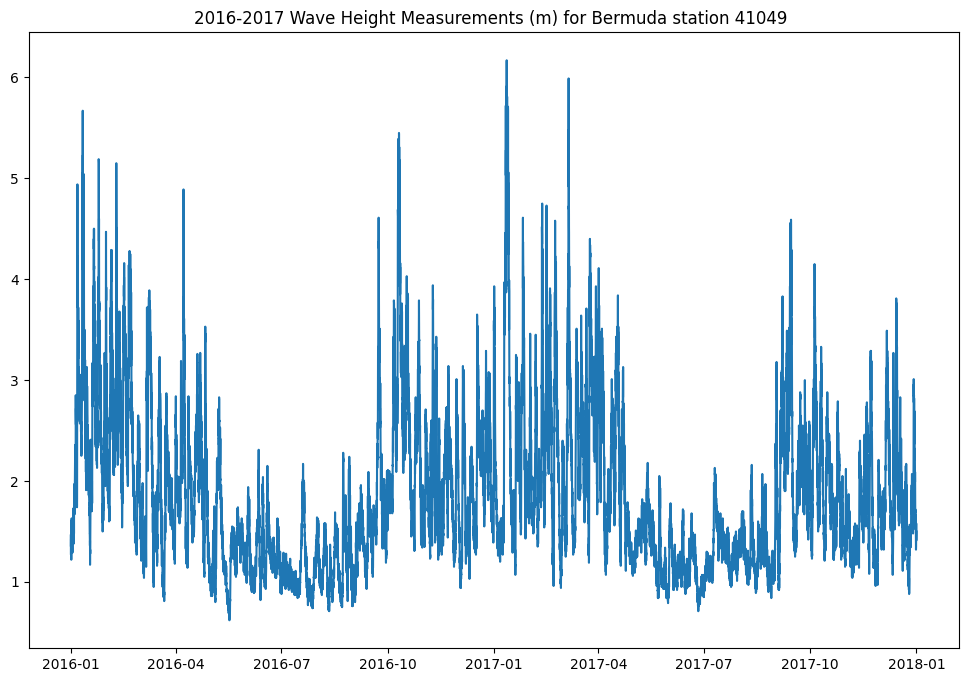

In [25]:
combined_data['WVHT'] = combined_data['WVHT'].astype(float) # changing the datatype for WVHT for a nicer look on the plot
plt.figure(figsize=(12,8)) # setting up the dimentions for our plot
plt.title('2016-2017 Wave Height Measurements (m) for Bermuda station 41049 ') # setting up a title
plt.plot(combined_data['WVHT']) # plotting our data

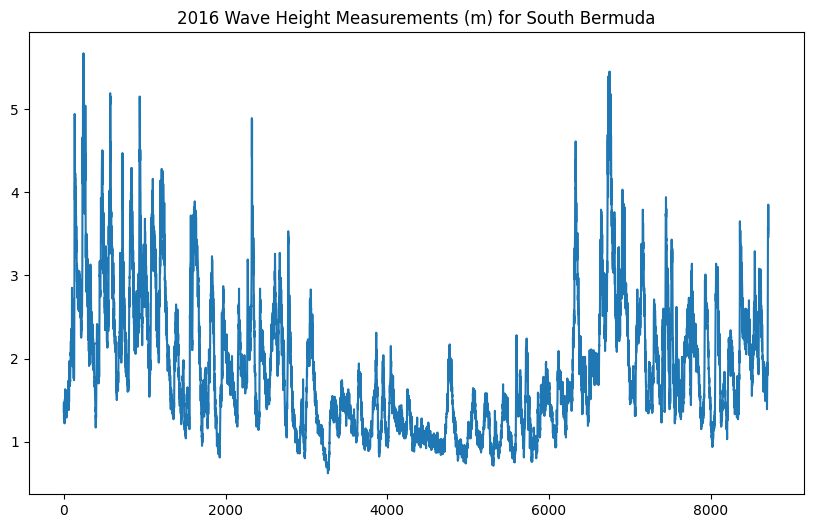

In [26]:
df16_clean['WVHT'] = df16_clean['WVHT'].astype(float) # changing the datatype for WVHT for a nicer look on the plot
plt.figure(figsize=(10,6)) # setting up the dimentions for our plot
plt.title('2016 Wave Height Measurements (m) for South Bermuda') # setting up a title
plt.plot(df16_clean['WVHT']) # plotting our data

In [27]:
arima_tts = combined_data['WVHT']
arima_train = arima_tts[:int(len(combined_data)*0.8)] # selecting 80% of arima_data for training
arima_test = arima_tts[int(len(combined_data)*0.8):] # selecting the last 20% of data for testing

In [28]:
print(len(arima_train))
print(len(arima_test))
print(len(combined_data))

13934
3484
17418


In [29]:
adf_test = adfuller(combined_data['WVHT']) # performing adf test
print('ADF Statistic: ', adf_test[0]) # printing results
print('P-value: ', adf_test[1])

ADF Statistic:  -11.516912857091654
P-value:  4.1288105194555085e-21


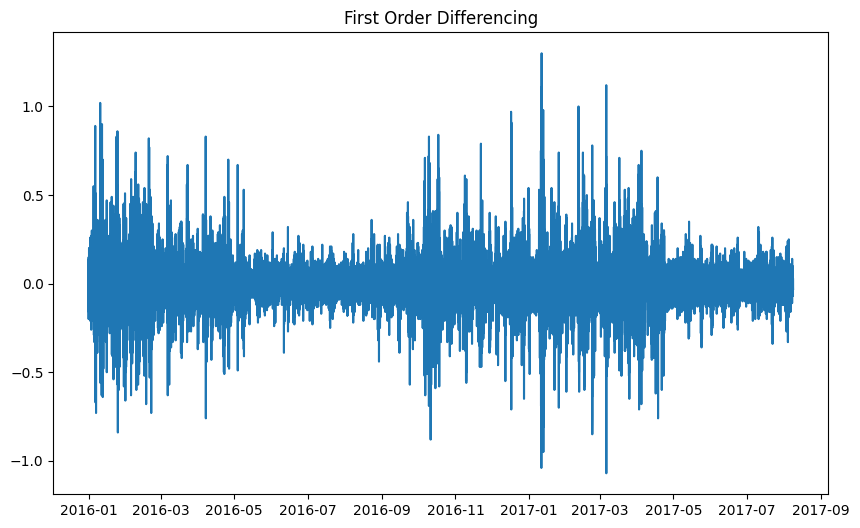

In [30]:
arima_train_diff = arima_train.diff().dropna() # first order differencing
plt.figure(figsize=(10, 6)) # setting up plot size
plt.title('First Order Differencing')
plt.plot(arima_train_diff) # plotting differencing results

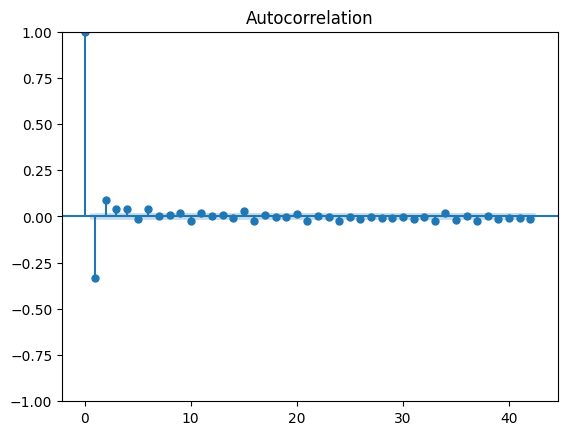

In [31]:
acf_plot = plot_acf(arima_train.diff().dropna()) # autocorrelation plot using training data

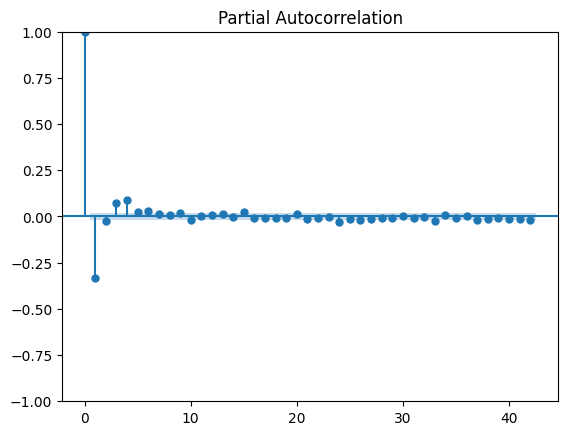

In [32]:
pacf_plot = plot_pacf(arima_train.diff().dropna()) # partial autocorrelation plot on training data

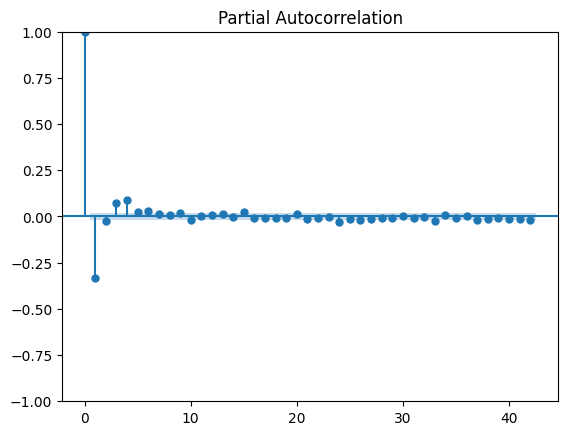

In [33]:
pacf_plot = plot_pacf(arima_train.diff().dropna()) # partial autocorrelation plot on training data

In [34]:
import pmdarima as pm # importing the package
auto_arima = pm.auto_arima(arima_train, stepwise = False, seasonal = False) # using auto arima on the training data
auto_arima # printing variable

ARIMA(order=(4, 1, 1), scoring_args={}, suppress_warnings=True)

In [35]:
waveheight_values = combined_data.WVHT
history = [x for x in arima_train]
predictions = list()
for t in range(len(arima_test)):
  model = ARIMA(history, order=(1,1,2)) # input the paramaters here within order=()
  model_fit = model.fit()
  output = model_fit.forecast()
  yhat = output[0]
  predictions.append(yhat)
  obs = arima_test[t]
  history.append(obs)
  print('predicted=%f, expected=%f' % (yhat, obs))

predicted=1.092317, expected=1.130000
predicted=1.111756, expected=1.090000
predicted=1.098551, expected=0.970000
predicted=1.012468, expected=1.100000
predicted=1.054831, expected=1.130000
predicted=1.104992, expected=1.110000
predicted=1.116977, expected=1.220000
predicted=1.190123, expected=1.130000
predicted=1.165156, expected=1.130000
predicted=1.143892, expected=1.150000
predicted=1.145097, expected=1.130000
predicted=1.134243, expected=1.160000
predicted=1.148940, expected=1.190000
predicted=1.177413, expected=1.240000
predicted=1.223837, expected=1.200000
predicted=1.218137, expected=1.110000
predicted=1.150347, expected=1.210000
predicted=1.179487, expected=1.170000
predicted=1.174003, expected=1.220000
predicted=1.203563, expected=1.210000
predicted=1.212453, expected=1.190000
predicted=1.201126, expected=1.200000
predicted=1.199902, expected=1.140000
predicted=1.160210, expected=1.120000
predicted=1.127067, expected=1.100000
predicted=1.101014, expected=1.100000
predicted=1.

In [36]:
import csv
with open('predictions.csv', 'w', newline='') as file:
    # Step 4: Using csv.writer to write the list to the CSV file
    writer = csv.writer(file)
    writer.writerow(predictions) # Use writerow for single list

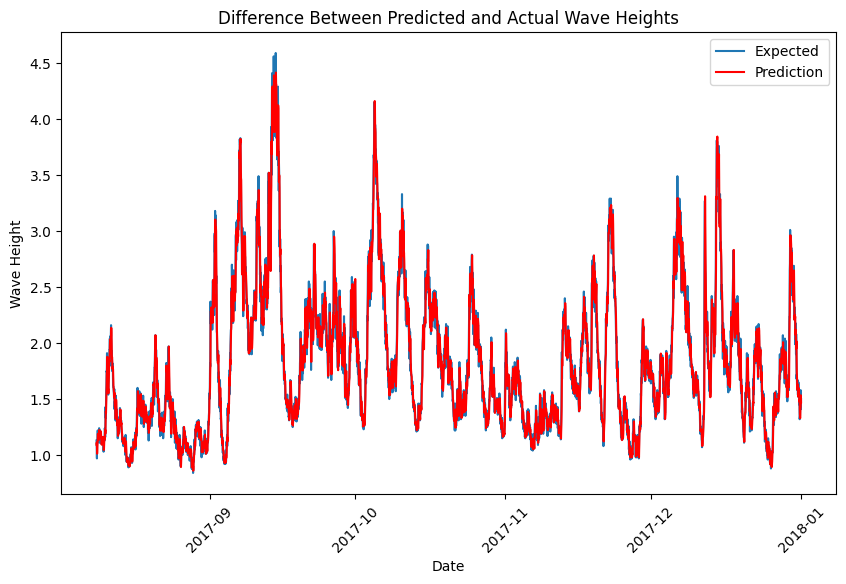

In [37]:
test_x = arima_test.index # creating an index variable so that it's the dates
plt.figure (figsize=(10,6)) # setting up the plot size
plt.plot(test_x, arima_test, label='Expected') # plotting expected values
plt.plot(test_x, predictions, color='red', label='Prediction') # plotting predicted values
plt.xlabel('Date')
plt.ylabel('Wave Height')
plt.title('Difference Between Predicted and Actual Wave Heights')
plt.legend() # adding a legend to the plot
plt.xticks(rotation=45) # rotating the x labels for better visualization
plt.show()